In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
import sys

In [5]:
sys.path.append('..')

In [6]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve, 
    RocCurveDisplay,
    precision_recall_curve,
    PrecisionRecallDisplay
)

In [19]:
from this_project.eda.plot import plot_roc_pr_curves
from this_project.censusdata import fetch_censusdata, make_linear_preprocessor

In [8]:
from sklearn import set_config
set_config(display='diagram')

In [9]:
X, y = fetch_censusdata()

In [10]:
preprocessor = make_linear_preprocessor()

In [28]:
preprocessor

FeatureUnion(transformer_list=[('pipeline-1',
                                Pipeline(steps=[('columnselector',
                                                 ColumnSelector(columns=['workclass',
                                                                         'education',
                                                                         'marital_status',
                                                                         'occupation',
                                                                         'relationship',
                                                                         'race',
                                                                         'sex',
                                                                         'native_country'])),
                                                ('simpleimputer',
                                                 SimpleImputer(fill_value='MISSING',
                                                               strategy='constant')),
                                                ('onehotencoder',
                                                 OneHotEncoder(handle_unknown='ignore'))])),
                               ('pipeline-...
                                                 SimpleImputer(strategy='median')),
                                                ('standardscaler',
                                                 StandardScaler())])),
                               ('pipeline-3',
                                Pipeline(steps=[('columnselector',
                                                 ColumnSelector(columns=['occupation',
                                                                         'sex',
                                                                         'race',
                                                                         'marital_status'])),
                                                ('simpleimputer',
                                                 SimpleImputer(fill_value='MISSING',
                                                               strategy='constant')),
                                                ('crossfeaturecalculator',
                                                 CrossFeatureCalculator()),
                                                ('onehotencoder',
                                                 OneHotEncoder(handle_unknown='ignore'))]))])

In [22]:
clf = make_pipeline(
    preprocessor,
    LogisticRegression(C=27., max_iter=1000, class_weight='balanced', random_state=0)
)

In [23]:
clf

Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('pipeline-1',
                                                 Pipeline(steps=[('columnselector',
                                                                  ColumnSelector(columns=['workclass',
                                                                                          'education',
                                                                                          'marital_status',
                                                                                          'occupation',
                                                                                          'relationship',
                                                                                          'race',
                                                                                          'sex',
                                                                                          'native_country'])),
                                                                 ('simpleimputer',
                                                                  SimpleImputer(fill_value='MISSING',
                                                                                strategy='constant')),
                                                                 ('onehotencoder',
                                                                  OneHotEncoder(handle_u...
                                                                  ColumnSelector(columns=['occupation',
                                                                                          'sex',
                                                                                          'race',
                                                                                          'marital_status'])),
                                                                 ('simpleimputer',
                                                                  SimpleImputer(fill_value='MISSING',
                                                                                strategy='constant')),
                                                                 ('crossfeaturecalculator',
                                                                  CrossFeatureCalculator()),
                                                                 ('onehotencoder',
                                                                  OneHotEncoder(handle_unknown='ignore'))]))])),
                ('logisticregression',
                 LogisticRegression(C=27.0, class_weight='balanced',
                                    max_iter=1000, random_state=0))])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.806


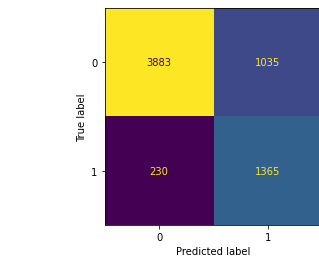

In [25]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

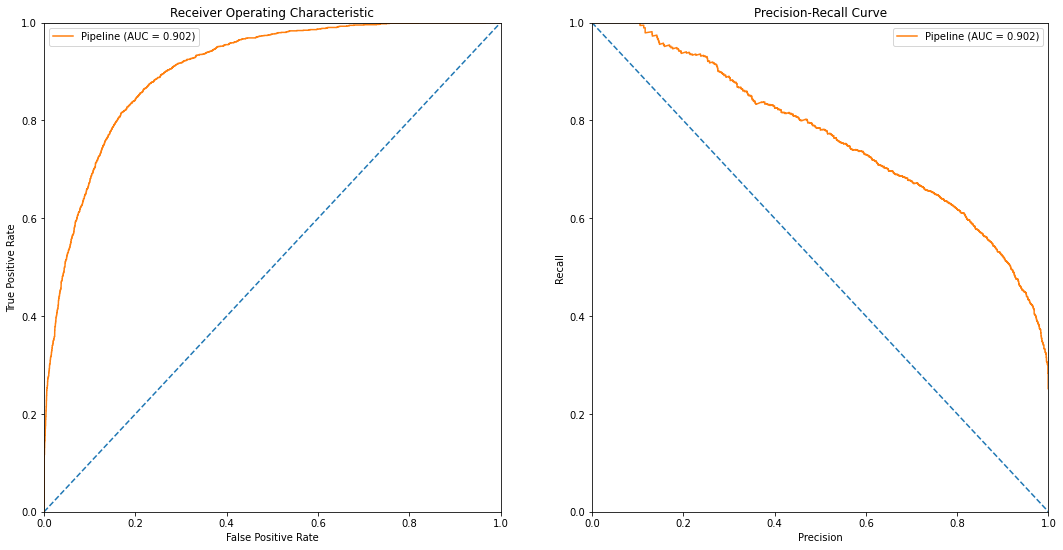

In [26]:
fig = plot_roc_pr_curves(clf, X_test, y_test)

In [27]:
y_pred = clf.predict(X_test)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f'precision: {precision}; recall: {recall}; fscore: {fscore}')

precision: 0.56875; recall: 0.8557993730407524; fscore: 0.6833541927409261
